## Parallelopiped classifier
- **The parallelepiped classifier is a simple machine learning algorithm used for multi-class classification tasks.** 
- **It works by dividing the feature space into several parallelepiped-shaped regions, one for each class.**
- **The classifier then assigns a new data point to the class whose parallelepiped region it falls within.**
- **The number and shape of the parallelepipeds are determined by the user-defined parameter, which specifies the number of intervals along each dimension.**
- **The classifier is computationally efficient and easy to implement, but it has limitations, such as poor performance when classes are not linearly separable, and it does not handle overlapping regions well.**

![parallel.jpg](parallel.jpg)

## Dataset
- **Here we are using Breast Cancer dataset for this parallelopiped classifier because it is linearly separable which leads to better performance of model and more importantly it only consists of two classes.**
- **The Breast Cancer Wisconsin (Diagnostic) dataset is a classic binary classification dataset used to predict whether a breast tumor is benign or malignant.**
- **It consists of 569 samples, each containing measurements of 30 features extracted from digitized images of fine needle aspirate (FNA) of breast mass.**
- **The features are computed from a digitized image of a FNA of a breast mass, and they describe characteristics of the cell nuclei present in the image, such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.**
- **Each sample in the dataset is labeled with a target variable indicating whether the tumor is benign (label 0) or malignant (label 1). The dataset has 357 benign samples and 212 malignant samples.**
- **The dataset is often used as a benchmark dataset for evaluating the performance of binary classification algorithms.**

Import Breast Cancer datast from scikit-learn module

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

The following code visualises the dataset for better interpretability

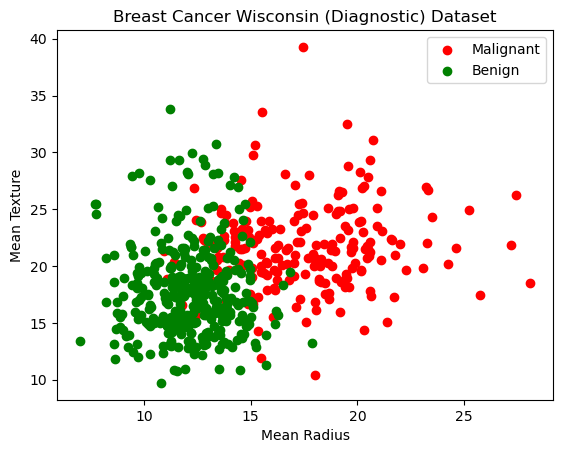

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target variable to the DataFrame
df['target'] = breast_cancer.target

# Separate the malignant and benign samples
malignant = df[df['target'] == 0]
benign = df[df['target'] == 1]

# Plot the data
fig, ax = plt.subplots()
ax.scatter(malignant['mean radius'], malignant['mean texture'], color='red', label='Malignant')
ax.scatter(benign['mean radius'], benign['mean texture'], color='green', label='Benign')
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_title('Breast Cancer Wisconsin (Diagnostic) Dataset')
ax.legend()
plt.show()

- The code defines a class called `ParallelepipedClassifier` which implements a classifier based on the parallelepiped method. 
- The `__init__` method initializes the class with the number of intervals, number of features and number of classes.
- The `fit` method fits the classifier to the training data by computing the minimum and maximum values of each feature for each class.
- The `predict` method predicts the class labels for new data points by checking which parallelepiped they fall into.
- The `print_feature_min_max` method prints the minimum and maximum values of each feature for each class.
- The `visualize_feature_min_max` method visualizes the minimum and maximum values of each feature for each class using a plot.
**Overall, the code provides an implementation of the parallelepiped classifier and methods to fit the classifier, predict class labels for new data points, and visualize the classifier.**

In [3]:
import numpy as np

class ParallelepipedClassifier:
    def __init__(self, num_intervals=3, n_features=4, n_classes=3):
        self.num_intervals = num_intervals
        self.n_features = n_features
        self.n_classes = n_classes
        self.feature_min = None
        self.feature_max = None
    
    def fit(self, X, y):
        # Compute the minimum and maximum values of each feature for each class
        self.feature_min = np.zeros((self.n_classes, self.n_features, self.num_intervals))
        self.feature_max = np.zeros((self.n_classes, self.n_features, self.num_intervals))
        for i in range(self.n_classes):
            for j in range(self.n_features):
                for k in range(self.num_intervals):
                    self.feature_min[i, j, k] = np.min(X[y == i, j]) + k * (np.max(X[:, j]) - np.min(X[:, j])) / self.num_intervals
                    self.feature_max[i, j, k] = np.min(X[y == i, j]) + (k + 1) * (np.max(X[:, j]) - np.min(X[:, j])) / self.num_intervals

    def predict(self, X):
        # Classify the test set using the parallelepiped classifier
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            for j in range(self.n_classes):
                inside_parallelepiped = True
                for k in range(self.n_features):
                    if not (X[i, k] >= self.feature_min[j, k, 0] and X[i, k] <= self.feature_max[j, k, self.num_intervals-1]):
                        inside_parallelepiped = False
                        break
                if inside_parallelepiped:
                    y_pred[i] = j
                    break
        return y_pred

    def print_feature_min_max(self):
        for i in range(self.n_classes):
            print(f"\nClass {i} feature min and max:")
            for j in range(self.n_features):
                min_val = np.min(self.feature_min[i, j, :])
                max_val = np.max(self.feature_max[i, j, :])
                print(f"Feature {j}: {min_val} - {max_val}")
        
    def visualize_feature_min_max(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        class_labels = [f"Class {i}" for i in range(self.n_classes)]
        class_handles = []
        for i in range(self.n_classes):
            for j in range(self.n_features):
                y_min = np.min(self.feature_min[i, j, :])
                y_max = np.max(self.feature_max[i, j, :])
                ax.plot([j, j], [y_min, y_max], color=f"C{i}")
                ax.text(j, y_min, f"{y_min:.2f}", ha='center', va='bottom', fontsize=8)
                ax.text(j, y_max, f"{y_max:.2f}", ha='center', va='top', fontsize=8)
            class_handles.append(ax.plot([], [], color=f"C{i}", label=class_labels[i])[0])
        ax.set_xticks(np.arange(self.n_features))
        ax.set_xticklabels(np.arange(self.n_features))
        ax.set_xlabel('Feature index')
        ax.set_ylabel('Feature value')
        ax.legend(handles=class_handles)
        plt.show()


- This code snippet uses the `train_test_split` function from the `sklearn.model_selection` module to split the dataset X and labels y into training and testing sets.
- The training set contains 80% of the data and the testing set contains 20% of the data. The random state is set to 42 for reproducibility.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- This code initializes an instance of the `ParallelepipedClassifier` class with 6 intervals per feature, number of features in the dataset for each datapoint, and total number of classes in the entire dataset.
- The `fit` method of the classifier is then called on the training data to compute the minimum and maximum values of each feature for each class. 
- Finally, the `predict` method is called on the test data to obtain predicted class labels for each sample in `X_test`, which are stored in the `y_pred` variable.

In [5]:
import numpy as np
model = ParallelepipedClassifier(num_intervals=6, n_features=X.shape[1], n_classes=np.unique(y).size)
model.fit(X_train, y_train)

# Test the classifier
y_pred = model.predict(X_test)

- This code snippet computes the accuracy score of the predicted labels y_pred against the true labels y_test.
- It uses the `accuracy_score` function from the `sklearn.metrics` module to calculate the accuracy, and then prints it out to the console.

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


This code calls the `print_feature_min_max()` method of the `ParallelepipedClassifier` object, which prints the minimum and maximum values of each feature for each class that were computed during the training phase.

In [7]:
model.print_feature_min_max()


Class 0 feature min and max:
Feature 0: 10.95 - 31.369
Feature 1: 10.38 - 39.95
Feature 2: 71.9 - 212.48
Feature 3: 361.6 - 2692.2
Feature 4: 0.07371 - 0.18447999999999998
Feature 5: 0.04605 - 0.33807
Feature 6: 0.02398 - 0.45078
Feature 7: 0.02031 - 0.22150999999999996
Feature 8: 0.1308 - 0.3181
Feature 9: 0.04996 - 0.09744
Feature 10: 0.1938 - 2.9553000000000003
Feature 11: 0.3621 - 4.8869
Feature 12: 1.334 - 22.557
Feature 13: 13.99 - 549.388
Feature 14: 0.002667 - 0.032084
Feature 15: 0.008422 - 0.14157
Feature 16: 0.01246 - 0.4084600000000001
Feature 17: 0.005174 - 0.057963999999999995
Feature 18: 0.007882 - 0.061459999999999994
Feature 19: 0.001087 - 0.030032199999999995
Feature 20: 12.84 - 40.202
Feature 21: 16.67 - 54.19
Feature 22: 85.1 - 281.80999999999995
Feature 23: 508.1 - 4538.5
Feature 24: 0.08822 - 0.23545000000000005
Feature 25: 0.05131 - 0.9619199999999998
Feature 26: 0.02398 - 1.2759800000000001
Feature 27: 0.02899 - 0.31999
Feature 28: 0.1565 - 0.6638
Feature 29: 0

- This code snippet will create a visualization of the minimum and maximum values of each feature for each class in the `ParallelepipedClassifier` object.
- The visualization will show a plot of each feature for each class, with the minimum and maximum values indicated by a line segment and the numerical values displayed as text.
- The x-axis represents the feature index, and the y-axis represents the feature value.
- Each class is represented by a different color.

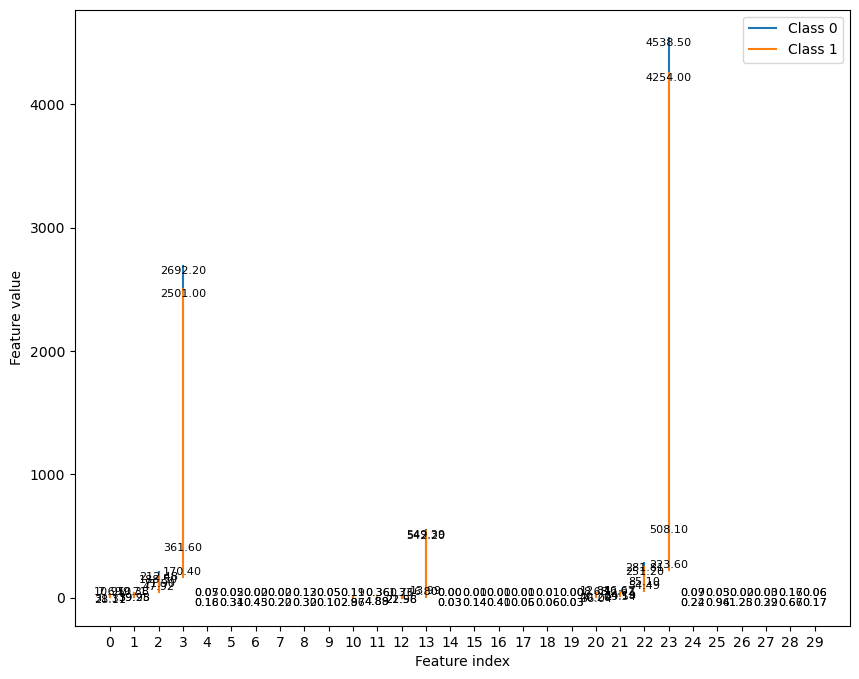

In [8]:
model.visualize_feature_min_max()